Training samples: 12500
Testing samples: 2500


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.5172 - loss: 1.4111 - val_accuracy: 0.9464 - val_loss: 0.1676
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8684 - loss: 0.4275 - val_accuracy: 0.9616 - val_loss: 0.1231
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9025 - loss: 0.3147 - val_accuracy: 0.9736 - val_loss: 0.0861
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9176 - loss: 0.2663 - val_accuracy: 0.9748 - val_loss: 0.0803
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9259 - loss: 0.2312 - val_accuracy: 0.9800 - val_loss: 0.0668
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9337 - loss: 0.2082 - val_accuracy: 0.9832 - val_loss: 0.0630
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9421 - loss: 0.1914 - val_accuracy: 0.9836 - val_loss: 0.0547
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9465 - loss: 0.1699 - 

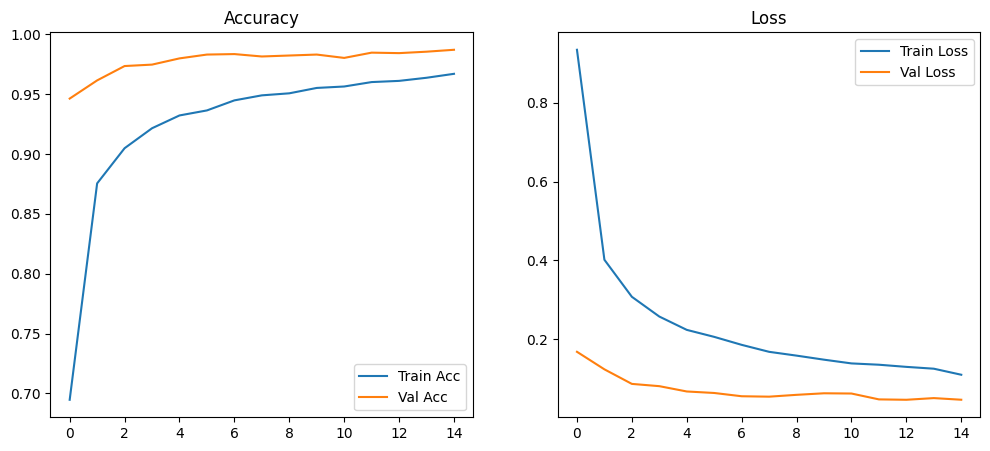

Saving Screenshot 2025-10-06 214717.png to Screenshot 2025-10-06 214717 (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


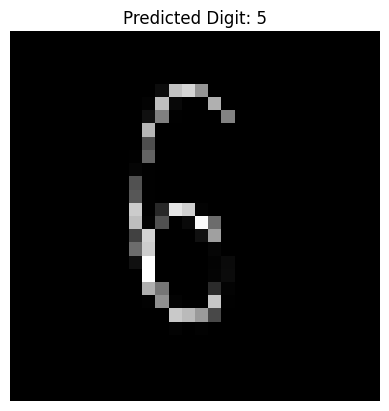

✅ Model saved as digit_recognition_cnn_highres.keras


In [21]:
# Improved Handwritten Digit Recognition (CNN)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split

# Load and preprocess data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:12500]
y_train = y_train[:12500]
x_test = x_test[:2500]
y_test = y_test[:2500]

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])


# Data augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)
datagen.fit(x_train)

# CNN model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Split manually
x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

history = model.fit(
    datagen.flow(x_train_part, y_train_part, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=15,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

# Google colab upload

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = load_img(img_path, color_mode='grayscale', target_size=(28,28))
    img = img_to_array(img)
    img = 255 - img  # invert if white background
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # add batch dim
    prediction = np.argmax(model.predict(img))

    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.axis('off')
    plt.show()

model.save("handwritten_digit_ml.keras")
print(" Model saved as handwritten_digit_ml.keras")


RUNNING ONLY



Upload an image? (y/n): y


Saving WhatsApp Image 2025-10-06 at 9.06.12 PM.jpeg to WhatsApp Image 2025-10-06 at 9.06.12 PM (5).jpeg

Processing file: WhatsApp Image 2025-10-06 at 9.06.12 PM (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
✅ Predicted Digit: 1


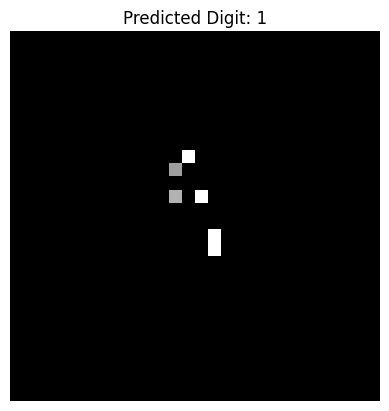


Upload an image? (y/n): y


Saving Screenshot 2025-10-06 094508.png to Screenshot 2025-10-06 094508.png

Processing file: Screenshot 2025-10-06 094508.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ Predicted Digit: 3


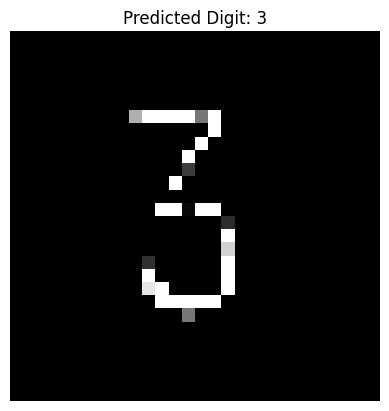


Upload an image? (y/n): y


Saving Screenshot 2025-10-06 214717.png to Screenshot 2025-10-06 214717 (5).png

Processing file: Screenshot 2025-10-06 214717 (5).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ Predicted Digit: 5


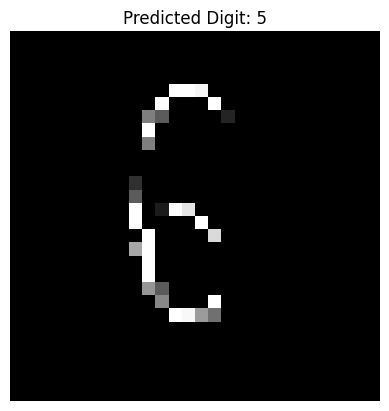


Upload an image? (y/n): y


Saving Four_full (1004).jpg to Four_full (1004).jpg

Processing file: Four_full (1004).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ Predicted Digit: 4


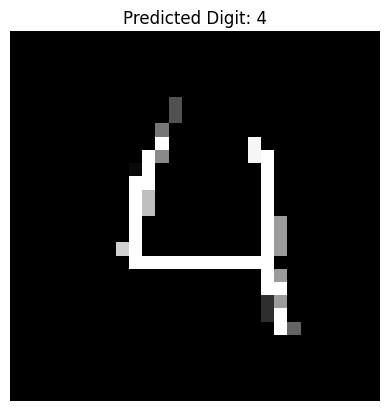


Upload an image? (y/n): y


Saving Seven_full (1018).jpg to Seven_full (1018).jpg

Processing file: Seven_full (1018).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ Predicted Digit: 7


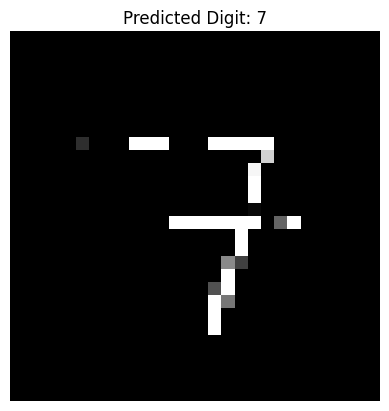


Upload an image? (y/n): y


Saving Six_full (102).jpg to Six_full (102).jpg

Processing file: Six_full (102).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Predicted Digit: 9


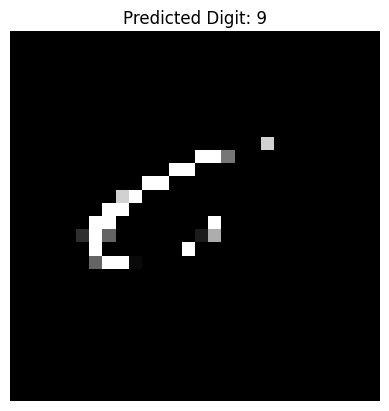


Upload an image? (y/n): y


Saving Six_full (1000).jpg to Six_full (1000).jpg

Processing file: Six_full (1000).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Predicted Digit: 0


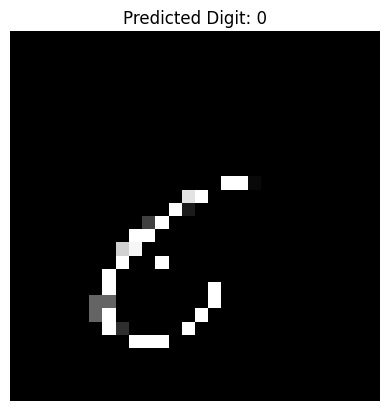


Upload an image? (y/n): n
Exiting testing loop.


In [22]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

model = load_model("handwritten_digit_ml.keras")

input_size = model.input_shape[1:3]

while True:
    choice = input("\nUpload an image? (y/n): ")
    if choice.lower() != 'y':
        print("Exiting testing loop.")
        break

    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\nProcessing file: {filename}")

        img = cv2.imread(filename)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        if np.mean(gray) > 127:
            gray = 255 - gray
        _, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
        bw = cv2.resize(bw, input_size)

        bw = bw.astype('float32') / 255.0
        bw = bw.reshape(1, input_size[0], input_size[1], 1)

        pred = np.argmax(model.predict(bw), axis=-1)[0]
        print(f"✅ Predicted Digit: {pred}")

        plt.imshow(bw.reshape(input_size[0], input_size[1]), cmap='gray')
        plt.title(f"Predicted Digit: {pred}")
        plt.axis('off')
        plt.show()
